# Load packages and use tensorflow as backend

In [17]:
#####################################################
# Install a pip package in the current Jupyter kernel
# import system level packages
import sys
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install requests
#import requests
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras
from keras.layers import Input, Dense, Lambda, Layer, Activation
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras import backend as K
from keras import metrics, optimizers
from keras.callbacks import Callback
from keras import utils

import pydot
import graphviz
from keras.utils import plot_model
from keras_tqdm import TQDMNotebookCallback
#from .tqdm_callback import TQDMNotebookCallback
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from tensorflow.python.client import device_lib

########################################################
#importing necessary libraries for scikit-learn

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
#from sklearn.grid_search import GridSearchCV   #!!!the grid search package that has issue, dont use it
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from scipy import interp
from scipy import stats

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing

In [18]:
##################################################
#test tensorflow, remember to change the kernel
#using kernel that supports GPU computing
#simple test to confirm tensorflow is actually working
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

a = tf.constant(10)
b = tf.constant(32)
print("10 + 32 = ", sess.run(a + b))

#manually set the random seed to define a replication
r_seed = 55555

#manually set the number for cross validation
num_cv = 5

print("current random seed is: ", r_seed)

b'Hello, TensorFlow!'
10 + 32 =  42
current random seed is:  55555


# Check the system information

In [19]:
#######################################################################################################
#check the system information, check if cuda and gpu computing for tensorflow is installed properly
print("whether tensorflow is built with cuda: ", tf.test.is_built_with_cuda())
print("whether gpu computing is available for tensorflow: ", tf.test.is_gpu_available())
print("using keras version: ", keras.__version__)
print("using tensorflow version: ", tf.__version__)
print("\n")
print("Device details:\n", device_lib.list_local_devices())
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

whether tensorflow is built with cuda:  True
whether gpu computing is available for tensorflow:  True
using keras version:  2.1.3
using tensorflow version:  1.4.1


Device details:
 [name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1864390926883114778
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 235864064
locality {
  bus_id: 1
}
incarnation: 18136133566630885456
physical_device_desc: "device: 0, name: TITAN RTX, pci bus id: 0000:01:00.0, compute capability: 7.5"
]
Default GPU Device: /device:GPU:0


# Reading files (before PCA compression, raw data)

In [ ]:
######################################
#use all samples
#####################################
#Reading files/documents
#compress_path = '/media/qiwei/work/Python_playground/VAE/TCGA_5_cancers/counts_data/high_var_counts_data/TCGA_(BLCA_COAD_SARC_PAAD_BRCA)_(0.2chemo)VSTnrom_count_expr_clinical_data.txt'

#open(path).readline()
#gene expression RNAseq, Batch effects normalized mRNA data

#og_data = pd.read_csv(compress_path, sep = "\t", index_col = 0)
#og_data = og_data.dropna(axis='columns')

#og_data.shape

# Data normalization choices

In [21]:
#standardize data
from sklearn.preprocessing import StandardScaler

# Standardizing the features
#df_stand = StandardScaler().fit_transform(og_data)
#df_stand

#Dont use standardizing
#df_stand = og_data

In [22]:
#minmax data transformation
from sklearn import preprocessing

#built up data frame
from pandas import DataFrame, Series
#Exprframe_og = og_data

# Scale RNAseq data using zero-one normalization
#Exprframe_zerone = preprocessing.MinMaxScaler().fit_transform(og_data)
#Exprframe_zerone.shape

#change column name
#Exprframe.columns.values[0] = "Gene"

#set rownames
#Exprframe = Exprframe.set_index('Gene')
#Exprframe

In [23]:
# logistic transformation, logistic sigmoid function
#def logits(x):
#    return 1 / (1 + np.exp(-x))

#Exprframe_logit = logits(og_data)
#Exprframe_logit.shape

In [24]:
# Standardize
#scaler = preprocessing.StandardScaler()
#scaler.fit((og_data))
#Exprfram_std = scaler.transform(og_data)
#Exprfram_std.shape

In [25]:
# If select the minmax method
#Exprframe = pd.DataFrame(Exprframe_zerone,
#                         columns=Exprframe.columns,
#                         index=Exprframe.index)

# If select the logistic transformation method
#Exprframe = pd.DataFrame(Exprframe_logit,
#                         columns=Exprframe.columns,
#                         index=Exprframe.index)

# If select the Standardization method
#Exprframe = pd.DataFrame(Exprfram_std,
#                         columns=Exprframe.columns,
#                         index=Exprframe.index)

# If use no transformation
#Exprframe = Exprframe_og

#print(Exprframe.shape)

# PCA Projection using Minka's MLE

In [26]:
#PCA Projection using Minka's MLE
from sklearn.decomposition import PCA
#pca = PCA(n_components = 'mle', svd_solver = 'full')

#use this, if using all dimension
#pca = PCA(n_components = None, svd_solver = 'auto')

#use this, if selecting the amount of variance that needs to be explained is greater than the percentage specified by n_components.
#pca = PCA(n_components = 0.9, svd_solver = 'full')

#print(pca)
#principalComponents = pca.fit_transform(Exprframe)
#principalDf = pd.DataFrame(data = principalComponents, index = og_data.index)
#import csv
#principalDf.head(5)

In [27]:
#np.savetxt("pca_explained_var_ratio(all_5_cancers).csv", pca.explained_variance_ratio_, delimiter = ',')

In [28]:
#Plotting the Cumulative Summation of the Explained Variance
#plt.figure()
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel('Number of Components')
#plt.ylabel('Variance (%)') #for each component
#plt.title('Pancreatic Adenocarcinoma Dataset Explained Variance')
#plt.savefig('5_cancers_PCA_Explained_Variance(thre_0.9).png')
#plt.show()

# Save the pca compressed encoding

In [29]:
# Encode rnaseq into the hidden/latent representation - and save output
#encoded_rnaseq_df = pd.DataFrame(df_pca)

#encoded_file = "counts_data/pca_compressed/encoded_rnaseq_PAAD_pca(og,label,0.2_var,69sample).tsv"
#encoded_rnaseq_df.to_csv(encoded_file, sep='\t')


In [30]:
# Encode rnaseq into the hidden/latent representation - and save output (all samples)
#encoded_rnaseq_df = pd.DataFrame(principalDf)

#encoded_file = "counts_data/pca_compressed/encoded_rnaseq_5cancers_pca_0.9(og,unlabel,0.2_var,all_sample).tsv"
#encoded_rnaseq_df.to_csv(encoded_file, sep='\t')

# Skip PCA part, read in the compressed pca encoding

In [31]:
##########################
#skip the PCA part
#Reading files/documents
#without grade
##########################
pca_path = 'counts_data/pca_compressed/encoded_rnaseq_COAD_pca_0.9_wLabels(og,5cancers,unlabel,0.2_var,all_sample).txt'

#with grade
#pca_path = 'counts_data/pca_compressed/encoded_rnaseq_BRCA_pca_0.9_wLabels(og,unlabel,0.2_var,all_sample).txt'

#open(path).readline()

df_pca = pd.read_csv(pca_path, sep = "\t", index_col = 0)
df_pca.head(5)

,Ensembl_ID,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,X378,X379,X380,X381,X382,X383,X384,X385,X386,response_group
73,TCGA-4N-A93T-01A,137.048440,-34.969115,-10.171960,-19.598360,-15.089826,-25.949166,-22.636458,7.859465,13.434262,...,-0.213377,0.305861,-2.136319,-1.160601,-1.120960,-0.172172,0.722465,-4.293517,2.182842,0
95,TCGA-5M-AAT6-01A,71.330834,16.793343,-7.671661,9.438507,-0.823426,29.787114,1.024714,-8.687493,4.188364,...,0.806469,2.580356,2.360315,0.498160,-0.941373,-1.276199,1.126461,1.077966,2.307028,1
221,TCGA-A6-2674-01A,67.493334,11.702372,-46.774220,-2.559073,27.083539,32.360833,17.406241,-18.972726,-2.969080,...,-2.900519,1.944521,-1.250489,-0.666686,-0.944745,0.187873,0.059687,-0.155113,-1.432753,1
228,TCGA-A6-2678-01A,113.398494,-23.081577,-38.825914,-28.863436,0.579220,22.208565,-3.476675,-10.652853,-12.934853,...,-1.223455,-0.108141,-0.656241,0.526299,-0.052370,1.343609,-0.136160,0.092084,-1.446755,0
235,TCGA-A6-2682-01A,118.204415,-8.484076,-16.711402,13.568448,-35.762235,-1.828364,-8.305745,0.586739,-22.200008,...,-0.987848,0.256342,-0.809347,-0.128667,-0.431335,-0.704809,-0.258426,-2.381271,0.204480,1


## Number of cases in each category

In [32]:
df_count = df_pca.groupby('response_group')['Ensembl_ID'].nunique()
print(df_count)
#df_count.nlargest(10)

response_group
0    74
1    43
Name: Ensembl_ID, dtype: int64


In [33]:
###################################################
#store the raw data, and use ensembl id as index
###################################################
df_raw = df_pca.iloc[:, 0:]
df_raw = df_raw.set_index('Ensembl_ID')

#notice the last column is the response_group
#df_raw.shape
df_raw.head(3)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X378,X379,X380,X381,X382,X383,X384,X385,X386,response_group
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-4N-A93T-01A,137.048440,-34.969115,-10.171960,-19.598360,-15.089826,-25.949166,-22.636458,7.859465,13.434262,2.756668,...,-0.213377,0.305861,-2.136319,-1.160601,-1.120960,-0.172172,0.722465,-4.293517,2.182842,0
TCGA-5M-AAT6-01A,71.330834,16.793343,-7.671661,9.438507,-0.823426,29.787114,1.024714,-8.687493,4.188364,-4.028566,...,0.806469,2.580356,2.360315,0.498160,-0.941373,-1.276199,1.126461,1.077966,2.307028,1
TCGA-A6-2674-01A,67.493334,11.702372,-46.774220,-2.559073,27.083539,32.360833,17.406241,-18.972726,-2.969080,-13.362575,...,-2.900519,1.944521,-1.250489,-0.666686,-0.944745,0.187873,0.059687,-0.155113,-1.432753,1


In [34]:
#################################
#here begins full data
################################
#full data, 4 labels analysis
#Complete Response    21
#Clinical Progressive Disease    10
#Radiographic Progressive Disease     7
#Stable Disease     7

#features
df_raw_coln = len(df_raw.columns)
X = df_raw.iloc[:,0:(df_raw_coln-1)]
X = X.values

#label/target
y = df_raw.loc[:, 'response_group']
y = y.values

#!!!!!!!
#check to confirm the last column is not response group, only y contains response group information
col = X.shape[1]
print(X[:,(col-1)])

#df_cancer.head(10)
#df_normal.head(10)

class_names = np.unique(y)
print("unique labels from y: ", class_names)

[ 2.1828423   2.30702753 -1.4327531  -1.44675453  0.20447972  0.32598499
  0.99741932 -0.6356615  -2.15265522  0.32978862 -1.74014731  1.0393205
 -0.54481094  0.18823068  0.3707058   0.73861341 -1.80185965  2.29645644
 -0.08561055 -0.22732756  3.07659374 -0.55960385 -1.71084166  0.58530638
 -2.04350057 -1.59812991 -1.09265199 -0.6397801   1.95984984  1.89222925
  2.36576464  1.10748319 -1.44172587  0.95699772  0.5297411   2.57084642
  0.80490029 -0.25678187 -0.05101121  0.61126951  1.9185728  -0.58048691
  0.04708783  0.10852447  0.24065442  0.10664713  0.03050075 -0.03401326
 -2.16777247 -0.00880321 -0.18420127  0.4150582  -2.85657479 -0.01002383
  3.22402535  0.1168064   0.95260195  2.15984347 -0.09550174  0.96221436
 -0.87386792  3.00237001  0.59683007  1.54005472 -2.45562999 -0.75973786
 -2.98286178  0.60910526  0.75735608 -1.12432362  0.70154155 -0.96652989
 -1.07153747 -0.70259748 -0.15787365  0.01472453  0.57310451 -0.81993969
  2.67330969 -3.19377929  0.25096391 -0.49831502  0.

# Load necessary methods

In [35]:
#########################################################################################
#plot confusion matrix
#inputs: cm, confusion matrix from cross_val_predict
#        normalize, whether to use normalize for each sections 
#        title, input the title name for the figure
#        cmap, color map using blue as default
#output: a confusion matrix plot with true label as y axis, and predicted label as x axis
#########################################################################################
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [36]:
##############################################################
#plot area under curve graph
#input: actual, true labels/target without one hot encoding
#       probs, predicted probabilities
#       n_classes, number of unique classes in target
#       title, input the title name for the figure
#output: a roc curve plot for multi class task
###############################################################
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle

def plot_multiclass_roc_auc(actual, probs, n_classes, title = 'multi-class roc'):
    lb = LabelBinarizer()
    lb.fit(actual)
    actual = lb.transform(actual)
    y_prob = probs
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(actual[:, i], y_prob[:, i])
        #please notice the difference between auc() and roc_auc_score()
        #also auc() only works on monotonic increasing or monotonic
        #decreasing input x
        roc_auc[i] = auc(fpr[i], tpr[i])
        
        colors = cycle(['blue', 'red', 'green', 'orange'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color,
        label='ROC curve of class {0} (area = {1:0.10f})'
            ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data using '+title)
    plt.legend(loc="lower right")
    #commented thus being able to use fig save function
    #plt.show()

In [37]:
#######################################################
#Random search CV method
#and
#Multi class roc_auc score method
########################################################
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from time import time
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import make_scorer, roc_auc_score

###########################################################################################
#Multi class roc_auc score method
#input: y_test, true labels from test fold
#       y_prob, predicted probability on test fold
#       average, string, [None, ‘micro’, ‘macro’ (default), ‘samples’, ‘weighted’]
#                'macro': Calculate metrics for each label, and find their unweighted mean. 
#                This does not take label imbalance into account.
#                'weighted': Calculate metrics for each label, and find their average, 
#                weighted by support (the number of true instances for each label).
#output: auroc value for each class
#multiclass_score, an implemented scoring method for multi class task
#!!!
#Notice that by default,needs_proba : boolean, default=False
#thus the multiclass_score will try to use the predicted label instead of predicted probability to calculate roc
#which is not correct, and will causing the tuning process to not find the best parameters
##############################################################################################
def multiclass_roc_auc_score(y_test, y_prob, average="weighted"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    #y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_prob, average=average)

#!!!
#Notice that by default,needs_proba : boolean, default=False
#thus the multiclass_score will try to use the predicted label instead of predicted probability to calculate roc
#which is not correct, and will causing the tuning process to not find the best parameters
multiclass_score = make_scorer(multiclass_roc_auc_score, needs_proba = True)

###############################################################################################
#Binary class roc auc score method
#input: y_true, true labels from test fold
#       y_score, predicted probability on test fold
#       average, string, [None, ‘micro’, ‘macro’ (default), ‘samples’, ‘weighted’]
#                'macro': Calculate metrics for each label, and find their unweighted mean. 
#                This does not take label imbalance into account.
#                'weighted': Calculate metrics for each label, and find their average, 
#                weighted by support (the number of true instances for each label).
#output: auroc value for each class
#############################################################################################
def binary_class_roc_auc_score(y_true, y_score, average="weighted"):

    return roc_auc_score(y_true, y_score, average=average)

binaryclass_score = make_scorer(binary_class_roc_auc_score, needs_threshold = True)

###################################################################################
#Random search CV method
#input: est, input estimator/classifier
#       p_distr, the grid of parameters to search on
#       nbr_iter, numbers of iteration on random search
#       X, feature, y, true labels
#output: ht_estimator, best estimator based on mean value of all folds
#        ht_params, best parameters
#
################################################################################################
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):
    #seed = 42
    cv = StratifiedKFold(n_splits = 3, random_state = r_seed, shuffle = True)
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr, scoring=multiclass_score,
                                  n_jobs=-1, n_iter=nbr_iter, cv=cv, return_train_score = True, verbose =10)
    #CV = Cross-Validation ( here using Stratified KFold CV) #,random_state = seed
    start = time()
    rdmsearch.fit(X,y)
    print('hyper-tuning time : %d seconds' % (time()-start))
    start = 0
   # ht_train_mean = rdmsearch.cv_results_['mean_train_score']
   # ht_train_std = rdmsearch.cv_results_['std_train_score']
   # ht_test_mean_sp0 = rdmsearch.cv_results_['split0_test_score']
   # ht_test_mean_sp1 = rdmsearch.cv_results_['split1_test_score']
   # ht_test_mean_sp2 = rdmsearch.cv_results_['split2_test_score']
    #ht_train_mean_sp3 = rdmsearch.cv_results_['split3_train_score']
    #ht_train_mean_sp4 = rdmsearch.cv_results_['split4_train_score']
    #ht_best_loc = np.where(rdmsearch.cv_results_['rank_test_score'] == 1)
    
    ht_cv_results = rdmsearch.cv_results_
    ht_estimator = rdmsearch.best_estimator_
    ht_params = rdmsearch.best_params_
    #ht_score = rdmsearch.best_score_
    
    return ht_estimator, ht_params, ht_cv_results

# Grid search

In [38]:
###########################################################
#Grid search Tune learning rate, n_estimators, and booster
#
##########################################################
param_test_this_loop = {
 'learning_rate':[0.05, 0.1, 0.2, 0.4, 0.6, 0.8],
 'n_estimators':[i for i in range(1,40)],
 'booster':['gbtree'],
 #'booster':['gbtree','gblinear','dart'],
    'silent':[True],
    'random_state':[r_seed]
}
cv = StratifiedKFold(n_splits = num_cv, random_state = r_seed, shuffle = True)

gsearch_loop1 = GridSearchCV(estimator = XGBClassifier(booster = 'gbtree'), 
 param_grid = param_test_this_loop, scoring="roc_auc",n_jobs=-1,iid=False, cv=cv,verbose=10)
gsearch_loop1.fit(X,y)
gsearch_loop1.grid_scores_, gsearch_loop1.best_params_, gsearch_loop1.best_score_

Fitting 5 folds for each of 234 candidates, totalling 1170 fits
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=1, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=1, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=1, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=1, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=1, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=2, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=1, random_state=55555, score=0.3925925925925926, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=2, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=1, random_state=55555, score=0.8, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_es

[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=21, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=9, random_state=55555, score=0.6666666666666666, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=9, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=18, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=5, random_state=55555, score=0.37777777777777777, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=7, random_state=55555, score=0.5555555555555555, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=14, random_state=55555, score=0.37037037037037035, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=14, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=9, random_state=55555, score=0.82142857142

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0287s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s


[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=16, random_state=55555, score=0.662962962962963, total=   0.1s
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=10, random_state=55555, score=0.8, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=12, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=14, random_state=55555, score=0.6481481481481481, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=16, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=10, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=21, random_state=55555, score=0.40740740740740744, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=21, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=5, random_state=55555, score=0.5925925925925926, total=

[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=17, random_state=55555, score=0.3851851851851852, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=17, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=8, random_state=55555, score=0.7857142857142857, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=21, random_state=55555, score=0.7232142857142857, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=25, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=11, random_state=55555, score=0.7925925925925926, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=11, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=22, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=13, random_state=55555, score=0.777777777

[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=28, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=35, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=26, random_state=55555, score=0.7333333333333333, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=26, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=33, random_state=55555, score=0.6592592592592593, total=   0.1s
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=24, random_state=55555, score=0.6666666666666667, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=24, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=33, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=20, random_state=55555, score=0.7037037037037037, total=   0.1s
[CV] booster=gbtr

[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=29, random_state=55555, score=0.7555555555555555, total=   0.1s
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=31, random_state=55555, score=0.762962962962963, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=29, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=31, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=27, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.1, n_estimators=2, random_state=55555, score=0.6875, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.1, n_estimators=2, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=36, random_state=55555, score=0.6518518518518519, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=36, random_state=55555 
[CV]  booster=gbtree, silent=True,

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.3s


[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=27, random_state=55555, score=0.7053571428571428, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=28, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.1, n_estimators=5, random_state=55555, score=0.6333333333333333, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.1, n_estimators=5, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=25, random_state=55555, score=0.725, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.1, n_estimators=6, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.1, n_estimators=5, random_state=55555, score=0.33333333333333337, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=30, random_state=55555, score=0.4222222222222222, total=   0.1s
[CV]  booster=gbtree, silent=True, learning_rate=0.1, n_estimators=6, random_state=5555

[CV]  booster=gbtree, silent=True, learning_rate=0.1, n_estimators=11, random_state=55555, score=0.6518518518518519, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.1, n_estimators=9, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.1, n_estimators=11, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.1, n_estimators=13, random_state=55555, score=0.7083333333333333, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=32, random_state=55555, score=0.7416666666666667, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.05, n_estimators=32, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.1, n_estimators=7, random_state=55555, score=0.6833333333333333, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.1, n_estimators=7, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=37, random_state=55555, score=0.6518518518518519,

[CV]  booster=gbtree, silent=True, learning_rate=0.1, n_estimators=10, random_state=55555, score=0.675, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.1, n_estimators=14, random_state=55555, score=0.7, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.1, n_estimators=16, random_state=55555, score=0.4148148148148148, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.1, n_estimators=22, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.1, n_estimators=14, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.1, n_estimators=12, random_state=55555, score=0.7142857142857142, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.1, n_estimators=13, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.1, n_estimators=16, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.1, n_estimators=20, random_state=55555, score=0.7, total=   0.1s
[CV] booster=gbtree, silent=

[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    2.2s


[CV]  booster=gbtree, silent=True, learning_rate=0.1, n_estimators=17, random_state=55555, score=0.4740740740740741, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.1, n_estimators=17, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.1, n_estimators=23, random_state=55555, score=0.8222222222222223, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.1, n_estimators=23, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.1, n_estimators=19, random_state=55555, score=0.45185185185185184, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.1, n_estimators=19, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.05, n_estimators=39, random_state=55555, score=0.7142857142857142, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.1, n_estimators=1, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.1, n_estimators=17, random_state=55555, score=0.8148148148148149

[CV] booster=gbtree, silent=True, learning_rate=0.1, n_estimators=37, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.1, n_estimators=35, random_state=55555, score=0.6814814814814815, total=   0.1s
[CV]  booster=gbtree, silent=True, learning_rate=0.1, n_estimators=28, random_state=55555, score=0.6696428571428571, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.1, n_estimators=35, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.1, n_estimators=29, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.1, n_estimators=24, random_state=55555, score=0.8222222222222223, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.1, n_estimators=24, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.1, n_estimators=22, random_state=55555, score=0.8148148148148149, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.1, n_estimators=22, random_state=55555 
[CV]  booster=gbtree, sile

[CV] booster=gbtree, silent=True, learning_rate=0.1, n_estimators=34, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=3, random_state=55555, score=0.7410714285714286, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.2, n_estimators=4, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=1, random_state=55555, score=0.3925925925925926, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.1, n_estimators=35, random_state=55555, score=0.6696428571428571, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.2, n_estimators=1, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=4, random_state=55555, score=0.7666666666666666, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.2, n_estimators=4, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.1, n_estimators=36, random_state=55555 
[CV]  booster=gbtree, silent=Tru

[CV] booster=gbtree, silent=True, learning_rate=0.2, n_estimators=8, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=10, random_state=55555, score=0.5037037037037038, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=6, random_state=55555, score=0.7857142857142857, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.2, n_estimators=7, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=12, random_state=55555, score=0.675, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.1, n_estimators=32, random_state=55555, score=0.637037037037037, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.2, n_estimators=10, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.2, n_estimators=12, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=8, random_state=55555, score=0.5259259259259259, total=   0.0s
[CV

[Parallel(n_jobs=-1)]: Done 364 tasks      | elapsed:    3.4s


[CV] booster=gbtree, silent=True, learning_rate=0.2, n_estimators=15, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.1, n_estimators=36, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=9, random_state=55555, score=0.6370370370370371, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.2, n_estimators=9, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=11, random_state=55555, score=0.6888888888888889, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=17, random_state=55555, score=0.725925925925926, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.2, n_estimators=11, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=19, random_state=55555, score=0.7678571428571428, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.2, n_estimators=20, random_state=55555 
[CV] booster=gbtree, silent=T

[CV] booster=gbtree, silent=True, learning_rate=0.2, n_estimators=12, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.1, n_estimators=39, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.2, n_estimators=18, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=24, random_state=55555, score=0.65, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.2, n_estimators=24, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=14, random_state=55555, score=0.7407407407407407, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.2, n_estimators=14, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=16, random_state=55555, score=0.674074074074074, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.2, n_estimators=16, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=12, random_stat

[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=21, random_state=55555, score=0.6666666666666666, total=   0.1s
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=27, random_state=55555, score=0.7259259259259259, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.2, n_estimators=21, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.2, n_estimators=27, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=25, random_state=55555, score=0.65, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.2, n_estimators=25, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=32, random_state=55555, score=0.6962962962962963, total=   0.1s
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=23, random_state=55555, score=0.6, total=   0.1s
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=17, random_state=55555, score=0.58518

[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    4.4s


[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=30, random_state=55555, score=0.675, total=   0.1s
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=26, random_state=55555, score=0.6583333333333333, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.2, n_estimators=30, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.2, n_estimators=26, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=32, random_state=55555, score=0.7321428571428571, total=   0.1s
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=24, random_state=55555, score=0.5925925925925926, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.2, n_estimators=24, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.2, n_estimators=33, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=28, random_state=55555, score=0.6296296296296297, total=   0.1

[CV] booster=gbtree, silent=True, learning_rate=0.2, n_estimators=35, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=6, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=33, random_state=55555, score=0.6962962962962963, total=   0.1s
[CV]  booster=gbtree, silent=True, learning_rate=0.4, n_estimators=4, random_state=55555, score=0.5037037037037038, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=4, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.2, n_estimators=33, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.4, n_estimators=4, random_state=55555, score=0.7481481481481482, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=4, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.4, n_estimators=6, random_state=55555, score=0.45185185185185184, total=   0.0s
[CV]  booster=gbtree, silent=Tr

[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=8, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.4, n_estimators=16, random_state=55555, score=0.7589285714285714, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=14, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=17, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.2, n_estimators=34, random_state=55555, score=0.6592592592592593, total=   0.1s
[CV]  booster=gbtree, silent=True, learning_rate=0.4, n_estimators=10, random_state=55555, score=0.6666666666666667, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=10, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=19, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.4, n_estimators=12, random_state=55555, score=0.5333333333333333, total=   0.0s
[CV] booster=gbtree, silent

[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=24, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=21, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=17, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.4, n_estimators=19, random_state=55555, score=0.7589285714285714, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=20, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.4, n_estimators=13, random_state=55555, score=0.7333333333333334, total=   0.1s
[CV]  booster=gbtree, silent=True, learning_rate=0.4, n_estimators=11, random_state=55555, score=0.5481481481481482, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=13, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=11, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.4, n_estimators=

[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=25, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=29, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.4, n_estimators=26, random_state=55555, score=0.7410714285714286, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=27, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.4, n_estimators=22, random_state=55555, score=0.7555555555555555, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=22, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.4, n_estimators=20, random_state=55555, score=0.75, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=21, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.4, n_estimators=16, random_state=55555, score=0.7250000000000001, total=   0.0s
[CV]  booster=gbtree, silent=True, learn

[Parallel(n_jobs=-1)]: Done 652 tasks      | elapsed:    5.7s


[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=25, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.4, n_estimators=21, random_state=55555, score=0.5333333333333333, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=21, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.4, n_estimators=27, random_state=55555, score=0.7481481481481482, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=27, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.4, n_estimators=31, random_state=55555, score=0.75, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=31, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.4, n_estimators=29, random_state=55555, score=0.7555555555555555, total=   0.1s
[CV]  booster=gbtree, silent=True, learning_rate=0.4, n_estimators=23, random_state=55555, score=0.7555555555555555, total=   0.1s

[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=28, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=4, random_state=55555, score=0.49999999999999994, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=2, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.4, n_estimators=38, random_state=55555, score=0.7678571428571428, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=4, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=32, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=39, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=2, random_state=55555, score=0.37037037037037035, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.4, n_estimators=34, random_state=55555, score=0.75, total=   0.1s
[CV] booster=gbtree, silent=True, learning

[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=4, random_state=55555, score=0.8222222222222222, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=9, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=7, random_state=55555, score=0.6833333333333333, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=7, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=5, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.4, n_estimators=31, random_state=55555, score=0.7407407407407407, total=   0.1s
[CV]  booster=gbtree, silent=True, learning_rate=0.4, n_estimators=39, random_state=55555, score=0.7555555555555555, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=39, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=11, random_state=55555 
[CV]  booster=gbtree, silent=Tr

[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=12, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=1, random_state=55555, score=0.4925925925925926, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=10, random_state=55555, score=0.8148148148148149, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=1, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=10, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.4, n_estimators=38, random_state=55555, score=0.7481481481481481, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.4, n_estimators=38, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=16, random_state=55555, score=0.5111111111111111, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=16, random_state=55555 
[CV]  booster=gbtree, silent

[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=11, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=21, random_state=55555, score=0.675, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=15, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=21, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=26, random_state=55555, score=0.5185185185185185, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=26, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=19, random_state=55555, score=0.6518518518518519, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=13, random_state=55555, score=0.6962962962962963, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=13, random_state=55555 
[CV]  booster=gbtree, silent=True, lear

[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:    6.7s


[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=11, random_state=55555, score=0.562962962962963, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=28, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=17, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=15, random_state=55555, score=0.6518518518518518, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=15, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=19, random_state=55555, score=0.6583333333333332, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=26, random_state=55555, score=0.6592592592592592, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=13, random_state=55555, score=0.675, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=26, random_state=55555 

[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=18, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=25, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=33, random_state=55555, score=0.762962962962963, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=33, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=31, random_state=55555, score=0.548148148148148, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=31, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=29, random_state=55555, score=0.7555555555555555, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=27, random_state=55555, score=0.674074074074074, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=23, random_state=55555, score=0.7555555555555555, to

[CV] booster=gbtree, silent=True, learning_rate=0.8, n_estimators=3, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=36, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=32, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=32, random_state=55555, score=0.762962962962963, total=   0.1s
[CV]  booster=gbtree, silent=True, learning_rate=0.8, n_estimators=2, random_state=55555, score=0.874074074074074, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.8, n_estimators=3, random_state=55555, score=0.6696428571428572, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.8, n_estimators=6, random_state=55555, score=0.837037037037037, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.8, n_estimators=4, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.8, n_estimators=6, random_state=55555 
[CV] booster=gbtree, silent=True, l

[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=36, random_state=55555, score=0.674074074074074, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=36, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=38, random_state=55555, score=0.7678571428571429, total=   0.1s
[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=39, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.8, n_estimators=7, random_state=55555, score=0.7185185185185186, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.8, n_estimators=7, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=34, random_state=55555, score=0.6666666666666667, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.8, n_estimators=13, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.8, n_estimators=5, random_state=55555, score=0.4703703703703704, tot

[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=39, random_state=55555, score=0.6666666666666667, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=35, random_state=55555, score=0.548148148148148, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.6, n_estimators=39, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.8, n_estimators=15, random_state=55555, score=0.6428571428571428, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.8, n_estimators=16, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.8, n_estimators=11, random_state=55555, score=0.6607142857142857, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.8, n_estimators=12, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.8, n_estimators=20, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.6, n_estimators=37, random_state=55555, score=0.548148148148148, t

[CV] booster=gbtree, silent=True, learning_rate=0.8, n_estimators=13, random_state=55555 


[Parallel(n_jobs=-1)]: Done 988 tasks      | elapsed:    7.8s


[CV]  booster=gbtree, silent=True, learning_rate=0.8, n_estimators=14, random_state=55555, score=0.6517857142857142, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.8, n_estimators=15, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.8, n_estimators=25, random_state=55555, score=0.4296296296296296, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.8, n_estimators=19, random_state=55555, score=0.7851851851851852, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.8, n_estimators=19, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.8, n_estimators=21, random_state=55555, score=0.7851851851851852, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.8, n_estimators=17, random_state=55555, score=0.7703703703703704, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.8, n_estimators=23, random_state=55555, score=0.4296296296296296, total=   0.0s
[CV] booster=gbtree, silent=True, 

[CV] booster=gbtree, silent=True, learning_rate=0.8, n_estimators=26, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.8, n_estimators=34, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.8, n_estimators=32, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.8, n_estimators=24, random_state=55555, score=0.4296296296296296, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.8, n_estimators=24, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.8, n_estimators=28, random_state=55555, score=0.7037037037037037, total=   0.1s
[CV]  booster=gbtree, silent=True, learning_rate=0.8, n_estimators=22, random_state=55555, score=0.7851851851851852, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.8, n_estimators=28, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.8, n_estimators=22, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.8, n_estimators=

[CV]  booster=gbtree, silent=True, learning_rate=0.8, n_estimators=29, random_state=55555, score=0.7037037037037037, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.8, n_estimators=29, random_state=55555 
[CV]  booster=gbtree, silent=True, learning_rate=0.8, n_estimators=31, random_state=55555, score=0.625, total=   0.0s
[CV]  booster=gbtree, silent=True, learning_rate=0.8, n_estimators=39, random_state=55555, score=0.6517857142857142, total=   0.1s
[CV]  booster=gbtree, silent=True, learning_rate=0.8, n_estimators=33, random_state=55555, score=0.7037037037037037, total=   0.1s
[CV]  booster=gbtree, silent=True, learning_rate=0.8, n_estimators=37, random_state=55555, score=0.625, total=   0.0s
[CV] booster=gbtree, silent=True, learning_rate=0.8, n_estimators=31, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.8, n_estimators=33, random_state=55555 
[CV] booster=gbtree, silent=True, learning_rate=0.8, n_estimators=37, random_state=55555 
[CV]  boost

[Parallel(n_jobs=-1)]: Done 1170 out of 1170 | elapsed:    8.8s finished
/home/qiwei/anaconda2/envs/tensorflow-gpu-test/lib/python3.5/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.61954, std: 0.15431, params: {'learning_rate': 0.05, 'silent': True, 'booster': 'gbtree', 'n_estimators': 1, 'random_state': 55555},
  mean: 0.61443, std: 0.13037, params: {'learning_rate': 0.05, 'silent': True, 'booster': 'gbtree', 'n_estimators': 2, 'random_state': 55555},
  mean: 0.63915, std: 0.17384, params: {'learning_rate': 0.05, 'silent': True, 'booster': 'gbtree', 'n_estimators': 3, 'random_state': 55555},
  mean: 0.65517, std: 0.18783, params: {'learning_rate': 0.05, 'silent': True, 'booster': 'gbtree', 'n_estimators': 4, 'random_state': 55555},
  mean: 0.66374, std: 0.16541, params: {'learning_rate': 0.05, 'silent': True, 'booster': 'gbtree', 'n_estimators': 5, 'random_state': 55555},
  mean: 0.63992, std: 0.17597, params: {'learning_rate': 0.05, 'silent': True, 'booster': 'gbtree', 'n_estimators': 6, 'random_state': 55555},
  mean: 0.62112, std: 0.16983, params: {'learning_rate': 0.05, 'silent': True, 'booster': 'gbtree', 'n_estimators': 7, 'random_state': 55555},

In [39]:
##########################################################
#output grid scores, and save to a file
#
#xgb_grid_scores = pd.DataFrame(gsearch1.grid_scores_)
#xgb_grid_file = os.path.join("Tuning_insights", "xgb_grid_socres(lr&n_estimators).tsv")
#xgb_grid_scores.to_csv(xgb_grid_file, sep='\t')

# Test to make sure the parameters are correct
#gsearch_loop1.best_params_
#gsearch_loop1.best_params_["learning_rate"]
#gsearch_loop1.best_params_["booster"]
#gsearch_loop1.best_params_["n_estimators"]

In [40]:
#################################################
#Grid search Tune max_depth and min_child_weight
#default
#################################################
param_test_this_loop = {
 'max_depth':[i for i in range(1,10)],
 'min_child_weight':[i for i in range(0,10)],
    'silent':[True],
    'random_state':[r_seed]
}
cv = StratifiedKFold(n_splits = num_cv, random_state = r_seed, shuffle = True)

gsearch_loop2 = GridSearchCV(estimator = XGBClassifier(learning_rate =gsearch_loop1.best_params_["learning_rate"], 
                                                  n_estimators=gsearch_loop1.best_params_["n_estimators"], 
                                                  booster = gsearch_loop1.best_params_["booster"]), 
param_grid = param_test_this_loop, scoring="roc_auc",n_jobs=-1,iid=False, cv=cv,verbose=10)
gsearch_loop2 .fit(X,y)
gsearch_loop2 .grid_scores_, gsearch_loop2 .best_params_, gsearch_loop2 .best_score_

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] random_state=55555, min_child_weight=0, silent=True, max_depth=1 
[CV] random_state=55555, min_child_weight=0, silent=True, max_depth=1 
[CV] random_state=55555, min_child_weight=0, silent=True, max_depth=1 
[CV] random_state=55555, min_child_weight=0, silent=True, max_depth=1 
[CV] random_state=55555, min_child_weight=1, silent=True, max_depth=1 
[CV] random_state=55555, min_child_weight=1, silent=True, max_depth=1 
[CV] random_state=55555, min_child_weight=1, silent=True, max_depth=1 
[CV]  random_state=55555, min_child_weight=0, silent=True, max_depth=1, score=0.6222222222222222, total=   0.0s
[CV]  random_state=55555, min_child_weight=1, silent=True, max_depth=1, score=0.6111111111111112, total=   0.0s
[CV]  random_state=55555, min_child_weight=0, silent=True, max_depth=1, score=0.5803571428571428, total=   0.0s
[CV] random_state=55555, min_child_weight=1, silent=True, max_depth=1 
[CV]  random_state=55555, min_chil

[CV] random_state=55555, min_child_weight=4, silent=True, max_depth=1 
[CV] random_state=55555, min_child_weight=6, silent=True, max_depth=1 
[CV] random_state=55555, min_child_weight=6, silent=True, max_depth=2 
[CV]  random_state=55555, min_child_weight=8, silent=True, max_depth=2, score=0.5000000000000001, total=   0.0s
[CV]  random_state=55555, min_child_weight=0, silent=True, max_depth=2, score=0.6833333333333333, total=   0.0s
[CV] random_state=55555, min_child_weight=8, silent=True, max_depth=2 
[CV]  random_state=55555, min_child_weight=0, silent=True, max_depth=3, score=0.7703703703703704, total=   0.1s
[CV] random_state=55555, min_child_weight=0, silent=True, max_depth=3 
[CV]  random_state=55555, min_child_weight=3, silent=True, max_depth=2, score=0.5555555555555556, total=   0.0s
[CV] random_state=55555, min_child_weight=3, silent=True, max_depth=2 
[CV]  random_state=55555, min_child_weight=4, silent=True, max_depth=1, score=0.7555555555555555, total=   0.0s
[CV]  random_s

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0291s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s


[CV]  random_state=55555, min_child_weight=3, silent=True, max_depth=2, score=0.6666666666666666, total=   0.0s
[CV]  random_state=55555, min_child_weight=7, silent=True, max_depth=1, score=0.7666666666666666, total=   0.0s
[CV] random_state=55555, min_child_weight=3, silent=True, max_depth=2 
[CV]  random_state=55555, min_child_weight=9, silent=True, max_depth=1, score=0.625925925925926, total=   0.0s
[CV] random_state=55555, min_child_weight=9, silent=True, max_depth=1 
[CV] random_state=55555, min_child_weight=7, silent=True, max_depth=1 
[CV]  random_state=55555, min_child_weight=9, silent=True, max_depth=2, score=0.625925925925926, total=   0.0s
[CV] random_state=55555, min_child_weight=9, silent=True, max_depth=2 
[CV]  random_state=55555, min_child_weight=6, silent=True, max_depth=2, score=0.5592592592592592, total=   0.0s
[CV]  random_state=55555, min_child_weight=3, silent=True, max_depth=2, score=0.6160714285714286, total=   0.0s
[CV] random_state=55555, min_child_weight=6, s

[CV] random_state=55555, min_child_weight=4, silent=True, max_depth=2 
[CV] random_state=55555, min_child_weight=9, silent=True, max_depth=3 
[CV]  random_state=55555, min_child_weight=5, silent=True, max_depth=1, score=0.674074074074074, total=   0.0s
[CV] random_state=55555, min_child_weight=2, silent=True, max_depth=4 
[CV]  random_state=55555, min_child_weight=7, silent=True, max_depth=3, score=0.5407407407407407, total=   0.0s
[CV] random_state=55555, min_child_weight=9, silent=True, max_depth=3 
[CV] random_state=55555, min_child_weight=7, silent=True, max_depth=3 
[CV]  random_state=55555, min_child_weight=0, silent=True, max_depth=3, score=0.7589285714285714, total=   0.0s
[CV] random_state=55555, min_child_weight=1, silent=True, max_depth=3 
[CV]  random_state=55555, min_child_weight=1, silent=True, max_depth=2, score=0.5666666666666667, total=   0.0s
[CV] random_state=55555, min_child_weight=1, silent=True, max_depth=2 
[CV]  random_state=55555, min_child_weight=9, silent=Tru

[CV]  random_state=55555, min_child_weight=6, silent=True, max_depth=3, score=0.762962962962963, total=   0.0s
[CV] random_state=55555, min_child_weight=6, silent=True, max_depth=3 
[CV]  random_state=55555, min_child_weight=2, silent=True, max_depth=4, score=0.7678571428571429, total=   0.0s
[CV]  random_state=55555, min_child_weight=6, silent=True, max_depth=4, score=0.7142857142857143, total=   0.0s
[CV] random_state=55555, min_child_weight=3, silent=True, max_depth=4 
[CV] random_state=55555, min_child_weight=7, silent=True, max_depth=4 
[CV] random_state=55555, min_child_weight=5, silent=True, max_depth=4 
[CV]  random_state=55555, min_child_weight=6, silent=True, max_depth=3, score=0.5592592592592592, total=   0.0s
[CV] random_state=55555, min_child_weight=6, silent=True, max_depth=3 
[CV]  random_state=55555, min_child_weight=4, silent=True, max_depth=3, score=0.6370370370370371, total=   0.0s
[CV]  random_state=55555, min_child_weight=7, silent=True, max_depth=4, score=0.592592

[CV]  random_state=55555, min_child_weight=1, silent=True, max_depth=5, score=0.5535714285714286, total=   0.0s
[CV] random_state=55555, min_child_weight=6, silent=True, max_depth=4 
[CV] random_state=55555, min_child_weight=2, silent=True, max_depth=5 
[CV]  random_state=55555, min_child_weight=3, silent=True, max_depth=4, score=0.6607142857142857, total=   0.0s
[CV] random_state=55555, min_child_weight=4, silent=True, max_depth=4 
[CV]  random_state=55555, min_child_weight=6, silent=True, max_depth=5, score=0.7083333333333334, total=   0.0s
[CV] random_state=55555, min_child_weight=1, silent=True, max_depth=4 
[CV] random_state=55555, min_child_weight=6, silent=True, max_depth=5 
[CV]  random_state=55555, min_child_weight=4, silent=True, max_depth=5, score=0.5259259259259259, total=   0.0s
[CV] random_state=55555, min_child_weight=4, silent=True, max_depth=5 
[CV]  random_state=55555, min_child_weight=8, silent=True, max_depth=4, score=0.5000000000000001, total=   0.0s
[CV] random_st

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.7s


[CV] random_state=55555, min_child_weight=7, silent=True, max_depth=5 
[CV]  random_state=55555, min_child_weight=6, silent=True, max_depth=4, score=0.6666666666666666, total=   0.0s
[CV]  random_state=55555, min_child_weight=1, silent=True, max_depth=6, score=0.837037037037037, total=   0.0s
[CV] random_state=55555, min_child_weight=6, silent=True, max_depth=4 
[CV] random_state=55555, min_child_weight=1, silent=True, max_depth=6 
[CV]  random_state=55555, min_child_weight=0, silent=True, max_depth=5, score=0.8222222222222222, total=   0.1s
[CV]  random_state=55555, min_child_weight=9, silent=True, max_depth=5, score=0.6074074074074074, total=   0.0s
[CV] random_state=55555, min_child_weight=0, silent=True, max_depth=5 
[CV]  random_state=55555, min_child_weight=5, silent=True, max_depth=5, score=0.5037037037037038, total=   0.0s
[CV] random_state=55555, min_child_weight=5, silent=True, max_depth=5 
[CV]  random_state=55555, min_child_weight=7, silent=True, max_depth=5, score=0.566666

[CV] random_state=55555, min_child_weight=0, silent=True, max_depth=6 
[CV]  random_state=55555, min_child_weight=2, silent=True, max_depth=6, score=0.6916666666666667, total=   0.0s
[CV]  random_state=55555, min_child_weight=6, silent=True, max_depth=6, score=0.7142857142857143, total=   0.0s
[CV] random_state=55555, min_child_weight=3, silent=True, max_depth=7 
[CV] random_state=55555, min_child_weight=4, silent=True, max_depth=6 
[CV] random_state=55555, min_child_weight=7, silent=True, max_depth=6 
[CV]  random_state=55555, min_child_weight=8, silent=True, max_depth=6, score=0.7185185185185186, total=   0.0s
[CV] random_state=55555, min_child_weight=2, silent=True, max_depth=6 
[CV]  random_state=55555, min_child_weight=1, silent=True, max_depth=5, score=0.6962962962962963, total=   0.1s
[CV] random_state=55555, min_child_weight=1, silent=True, max_depth=5 
[CV] random_state=55555, min_child_weight=8, silent=True, max_depth=6 
[CV]  random_state=55555, min_child_weight=4, silent=Tr

[CV]  random_state=55555, min_child_weight=1, silent=True, max_depth=7, score=0.7166666666666667, total=   0.0s
[CV] random_state=55555, min_child_weight=1, silent=True, max_depth=7 
[CV]  random_state=55555, min_child_weight=5, silent=True, max_depth=6, score=0.7142857142857142, total=   0.0s
[CV] random_state=55555, min_child_weight=8, silent=True, max_depth=7 
[CV] random_state=55555, min_child_weight=2, silent=True, max_depth=8 
[CV]  random_state=55555, min_child_weight=1, silent=True, max_depth=6, score=0.6962962962962963, total=   0.0s
[CV]  random_state=55555, min_child_weight=9, silent=True, max_depth=6, score=0.6339285714285715, total=   0.0s
[CV] random_state=55555, min_child_weight=5, silent=True, max_depth=8 
[CV]  random_state=55555, min_child_weight=6, silent=True, max_depth=7, score=0.5592592592592592, total=   0.0s


[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.1s


[CV] random_state=55555, min_child_weight=6, silent=True, max_depth=7 
[CV]  random_state=55555, min_child_weight=8, silent=True, max_depth=7, score=0.43333333333333335, total=   0.0s
[CV] random_state=55555, min_child_weight=0, silent=True, max_depth=7 
[CV] random_state=55555, min_child_weight=8, silent=True, max_depth=7 
[CV] random_state=55555, min_child_weight=4, silent=True, max_depth=7 
[CV]  random_state=55555, min_child_weight=5, silent=True, max_depth=8, score=0.5037037037037038, total=   0.0s
[CV] random_state=55555, min_child_weight=5, silent=True, max_depth=8 
[CV]  random_state=55555, min_child_weight=6, silent=True, max_depth=7, score=0.6666666666666666, total=   0.0s
[CV] random_state=55555, min_child_weight=6, silent=True, max_depth=7 
[CV]  random_state=55555, min_child_weight=1, silent=True, max_depth=7, score=0.5535714285714286, total=   0.0s
[CV] random_state=55555, min_child_weight=2, silent=True, max_depth=7 
[CV]  random_state=55555, min_child_weight=6, silent=T

[CV] random_state=55555, min_child_weight=6, silent=True, max_depth=8 
[CV]  random_state=55555, min_child_weight=3, silent=True, max_depth=8, score=0.6607142857142857, total=   0.0s
[CV]  random_state=55555, min_child_weight=7, silent=True, max_depth=8, score=0.75, total=   0.0s
[CV] random_state=55555, min_child_weight=8, silent=True, max_depth=8 
[CV]  random_state=55555, min_child_weight=9, silent=True, max_depth=7, score=0.4666666666666667, total=   0.0s
[CV]  random_state=55555, min_child_weight=0, silent=True, max_depth=7, score=0.8222222222222222, total=   0.1s
[CV] random_state=55555, min_child_weight=0, silent=True, max_depth=7 
[CV] random_state=55555, min_child_weight=4, silent=True, max_depth=8 
[CV]  random_state=55555, min_child_weight=1, silent=True, max_depth=8, score=0.6962962962962963, total=   0.0s
[CV] random_state=55555, min_child_weight=1, silent=True, max_depth=8 
[CV]  random_state=55555, min_child_weight=5, silent=True, max_depth=7, score=0.5925925925925926, t

[CV]  random_state=55555, min_child_weight=3, silent=True, max_depth=9, score=0.8, total=   0.0s
[CV]  random_state=55555, min_child_weight=0, silent=True, max_depth=9, score=0.5851851851851851, total=   0.1s
[CV] random_state=55555, min_child_weight=9, silent=True, max_depth=9 
[CV] random_state=55555, min_child_weight=3, silent=True, max_depth=9 
[CV] random_state=55555, min_child_weight=2, silent=True, max_depth=8 
[CV] random_state=55555, min_child_weight=0, silent=True, max_depth=9 
[CV]  random_state=55555, min_child_weight=2, silent=True, max_depth=8, score=0.6222222222222222, total=   0.0s
[CV]  random_state=55555, min_child_weight=4, silent=True, max_depth=8, score=0.6874999999999999, total=   0.0s
[CV] random_state=55555, min_child_weight=5, silent=True, max_depth=9 
[CV] random_state=55555, min_child_weight=5, silent=True, max_depth=8 
[CV]  random_state=55555, min_child_weight=9, silent=True, max_depth=8, score=0.6339285714285715, total=   0.0s
[CV]  random_state=55555, min

[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    2.0s finished
/home/qiwei/anaconda2/envs/tensorflow-gpu-test/lib/python3.5/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.60478, std: 0.09383, params: {'random_state': 55555, 'min_child_weight': 0, 'silent': True, 'max_depth': 1},
  mean: 0.60478, std: 0.09383, params: {'random_state': 55555, 'min_child_weight': 1, 'silent': True, 'max_depth': 1},
  mean: 0.60478, std: 0.09383, params: {'random_state': 55555, 'min_child_weight': 2, 'silent': True, 'max_depth': 1},
  mean: 0.56561, std: 0.07556, params: {'random_state': 55555, 'min_child_weight': 3, 'silent': True, 'max_depth': 1},
  mean: 0.62653, std: 0.08015, params: {'random_state': 55555, 'min_child_weight': 4, 'silent': True, 'max_depth': 1},
  mean: 0.64284, std: 0.06551, params: {'random_state': 55555, 'min_child_weight': 5, 'silent': True, 'max_depth': 1},
  mean: 0.64731, std: 0.07108, params: {'random_state': 55555, 'min_child_weight': 6, 'silent': True, 'max_depth': 1},
  mean: 0.64464, std: 0.09280, params: {'random_state': 55555, 'min_child_weight': 7, 'silent': True, 'max_depth': 1},
  mean: 0.62312, std: 0.13388, params: {'random_

In [41]:
##########################################
#Grid search Tune subsample and colsample
#
##########################################
param_test_this_loop = {
             'subsample':[i/100.0 for i in range(10,110,10)],
             'colsample_bytree':[i/100.0 for i in range(10,110,10)],
             
    'silent':[True],
    'random_state':[r_seed]
}
cv = StratifiedKFold(n_splits = num_cv, random_state = r_seed, shuffle = True)

gsearch_loop3 = GridSearchCV(estimator = XGBClassifier(learning_rate =gsearch_loop1.best_params_["learning_rate"], 
                                                      n_estimators=gsearch_loop1.best_params_["n_estimators"], 
                                                      booster = gsearch_loop1.best_params_["booster"],
                                                      max_depth =gsearch_loop2.best_params_["max_depth"],
                                                      min_child_weight=gsearch_loop2.best_params_["min_child_weight"]), 
  param_grid = param_test_this_loop, scoring="roc_auc",n_jobs=-1,iid=False, cv=cv,verbose=10)
gsearch_loop3.fit(X,y)
gsearch_loop3.grid_scores_, gsearch_loop3.best_params_, gsearch_loop3.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.1, random_state=55555, silent=True, colsample_bytree=0.1 
[CV] subsample=0.1, random_state=55555, silent=True, colsample_bytree=0.1 
[CV] subsample=0.1, random_state=55555, silent=True, colsample_bytree=0.1 
[CV] subsample=0.1, random_state=55555, silent=True, colsample_bytree=0.1 
[CV] subsample=0.2, random_state=55555, silent=True, colsample_bytree=0.1 
[CV] subsample=0.2, random_state=55555, silent=True, colsample_bytree=0.1 
[CV]  subsample=0.1, random_state=55555, silent=True, colsample_bytree=0.1, score=0.6407407407407407, total=   0.0s
[CV] subsample=0.1, random_state=55555, silent=True, colsample_bytree=0.1 
[CV] subsample=0.2, random_state=55555, silent=True, colsample_bytree=0.1 
[CV]  subsample=0.2, random_state=55555, silent=True, colsample_bytree=0.1, score=0.6222222222222222, total=   0.0s
[CV]  subsample=0.1, random_state=55555, silent=True, colsample_bytree=0.1, score=0.44166666666666665, to

[CV] subsample=0.5, random_state=55555, silent=True, colsample_bytree=0.1 
[CV]  subsample=0.6, random_state=55555, silent=True, colsample_bytree=0.3, score=0.6222222222222222, total=   0.0s
[CV] subsample=0.5, random_state=55555, silent=True, colsample_bytree=0.2 
[CV] subsample=0.2, random_state=55555, silent=True, colsample_bytree=0.2 
[CV] subsample=0.6, random_state=55555, silent=True, colsample_bytree=0.3 
[CV] subsample=0.9, random_state=55555, silent=True, colsample_bytree=0.2 
[CV]  subsample=0.2, random_state=55555, silent=True, colsample_bytree=0.2, score=0.6666666666666666, total=   0.0s
[CV] subsample=0.2, random_state=55555, silent=True, colsample_bytree=0.2 
[CV]  subsample=0.5, random_state=55555, silent=True, colsample_bytree=0.1, score=0.7185185185185186, total=   0.0s
[CV]  subsample=0.8, random_state=55555, silent=True, colsample_bytree=0.1, score=0.5666666666666667, total=   0.0s
[CV]  subsample=0.9, random_state=55555, silent=True, colsample_bytree=0.2, score=0.75

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0206s.) Setting batch_size=18.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s


[CV] subsample=0.9, random_state=55555, silent=True, colsample_bytree=0.3 
[CV]  subsample=0.2, random_state=55555, silent=True, colsample_bytree=0.3, score=0.35, total=   0.0s
[CV]  subsample=0.5, random_state=55555, silent=True, colsample_bytree=0.2, score=0.6607142857142857, total=   0.0s
[CV] subsample=0.9, random_state=55555, silent=True, colsample_bytree=0.1 
[CV] subsample=0.2, random_state=55555, silent=True, colsample_bytree=0.3 
[CV] subsample=0.8, random_state=55555, silent=True, colsample_bytree=0.1 
[CV] subsample=0.5, random_state=55555, silent=True, colsample_bytree=0.1 
[CV]  subsample=0.2, random_state=55555, silent=True, colsample_bytree=0.2, score=0.33333333333333337, total=   0.0s
[CV] subsample=0.6, random_state=55555, silent=True, colsample_bytree=0.3 
[CV] subsample=0.6, random_state=55555, silent=True, colsample_bytree=0.2 
[CV] subsample=0.2, random_state=55555, silent=True, colsample_bytree=0.2 
[CV]  subsample=0.8, random_state=55555, silent=True, colsample_b

[CV] subsample=0.6, random_state=55555, silent=True, colsample_bytree=0.1 
[CV] subsample=0.7, random_state=55555, silent=True, colsample_bytree=0.3 
[CV] subsample=1.0, random_state=55555, silent=True, colsample_bytree=0.3 
[CV]  subsample=1.0, random_state=55555, silent=True, colsample_bytree=0.1, score=0.5037037037037038, total=   0.0s
[CV]  subsample=1.0, random_state=55555, silent=True, colsample_bytree=0.2, score=0.5185185185185186, total=   0.0s
[CV] subsample=1.0, random_state=55555, silent=True, colsample_bytree=0.1 
[CV] subsample=1.0, random_state=55555, silent=True, colsample_bytree=0.2 
[CV]  subsample=0.4, random_state=55555, silent=True, colsample_bytree=0.3, score=0.6148148148148148, total=   0.0s
[CV] subsample=0.4, random_state=55555, silent=True, colsample_bytree=0.3 
[CV]  subsample=0.3, random_state=55555, silent=True, colsample_bytree=0.2, score=0.5583333333333333, total=   0.0s
[CV]  subsample=0.6, random_state=55555, silent=True, colsample_bytree=0.2, score=0.66

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s


[CV]  subsample=0.4, random_state=55555, silent=True, colsample_bytree=0.2, score=0.5982142857142857, total=   0.0s
[CV] subsample=0.1, random_state=55555, silent=True, colsample_bytree=0.3 
[CV]  subsample=0.5, random_state=55555, silent=True, colsample_bytree=0.3, score=0.45925925925925926, total=   0.0s
[CV]  subsample=0.7, random_state=55555, silent=True, colsample_bytree=0.3, score=0.5089285714285714, total=   0.0s
[CV]  subsample=0.1, random_state=55555, silent=True, colsample_bytree=0.4, score=0.5851851851851851, total=   0.0s
[CV] subsample=0.5, random_state=55555, silent=True, colsample_bytree=0.3 
[CV] subsample=0.1, random_state=55555, silent=True, colsample_bytree=0.4 
[CV] subsample=0.8, random_state=55555, silent=True, colsample_bytree=0.3 
[CV] subsample=1.0, random_state=55555, silent=True, colsample_bytree=0.4 
[CV]  subsample=0.7, random_state=55555, silent=True, colsample_bytree=0.2, score=0.625, total=   0.0s
[CV] subsample=0.6, random_state=55555, silent=True, cols

[CV]  subsample=0.4, random_state=55555, silent=True, colsample_bytree=0.4, score=0.6296296296296297, total=   0.0s
[CV]  subsample=0.2, random_state=55555, silent=True, colsample_bytree=0.4, score=0.6148148148148148, total=   0.0s
[CV] subsample=0.2, random_state=55555, silent=True, colsample_bytree=0.4 
[CV]  subsample=1.0, random_state=55555, silent=True, colsample_bytree=0.4, score=0.65, total=   0.0s
[CV] subsample=0.4, random_state=55555, silent=True, colsample_bytree=0.4 
[CV] subsample=1.0, random_state=55555, silent=True, colsample_bytree=0.4 
[CV] subsample=0.1, random_state=55555, silent=True, colsample_bytree=0.6 
[CV]  subsample=0.7, random_state=55555, silent=True, colsample_bytree=0.4, score=0.6592592592592592, total=   0.0s
[CV] subsample=0.7, random_state=55555, silent=True, colsample_bytree=0.4 
[CV]  subsample=0.2, random_state=55555, silent=True, colsample_bytree=0.4, score=0.2833333333333333, total=   0.0s
[CV]  subsample=0.4, random_state=55555, silent=True, colsa

[CV] subsample=0.2, random_state=55555, silent=True, colsample_bytree=0.5 
[CV] subsample=0.8, random_state=55555, silent=True, colsample_bytree=0.5 
[CV]  subsample=0.5, random_state=55555, silent=True, colsample_bytree=0.5, score=0.7481481481481481, total=   0.0s
[CV] subsample=0.3, random_state=55555, silent=True, colsample_bytree=0.6 
[CV]  subsample=0.5, random_state=55555, silent=True, colsample_bytree=0.4, score=0.725925925925926, total=   0.0s
[CV] subsample=0.5, random_state=55555, silent=True, colsample_bytree=0.4 
[CV] subsample=0.5, random_state=55555, silent=True, colsample_bytree=0.5 
[CV]  subsample=0.5, random_state=55555, silent=True, colsample_bytree=0.6, score=0.4518518518518518, total=   0.0s
[CV] subsample=0.5, random_state=55555, silent=True, colsample_bytree=0.6 
[CV]  subsample=0.2, random_state=55555, silent=True, colsample_bytree=0.5, score=0.7111111111111111, total=   0.0s
[CV]  subsample=0.8, random_state=55555, silent=True, colsample_bytree=0.4, score=0.748

[CV]  subsample=0.6, random_state=55555, silent=True, colsample_bytree=0.5, score=0.6222222222222222, total=   0.0s
[CV] subsample=0.6, random_state=55555, silent=True, colsample_bytree=0.5 
[CV]  subsample=0.9, random_state=55555, silent=True, colsample_bytree=0.5, score=0.6444444444444444, total=   0.0s
[CV] subsample=0.9, random_state=55555, silent=True, colsample_bytree=0.5 
[CV]  subsample=0.9, random_state=55555, silent=True, colsample_bytree=0.4, score=0.6222222222222222, total=   0.0s
[CV] subsample=0.9, random_state=55555, silent=True, colsample_bytree=0.4 
[CV]  subsample=0.4, random_state=55555, silent=True, colsample_bytree=0.6, score=0.6074074074074074, total=   0.0s
[CV]  subsample=0.1, random_state=55555, silent=True, colsample_bytree=0.7, score=0.5044642857142857, total=   0.0s
[CV] subsample=0.2, random_state=55555, silent=True, colsample_bytree=0.7 
[CV]  subsample=0.6, random_state=55555, silent=True, colsample_bytree=0.5, score=0.5083333333333334, total=   0.0s
[CV]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:    0.9s


[CV] subsample=1.0, random_state=55555, silent=True, colsample_bytree=0.6 
[CV]  subsample=1.0, random_state=55555, silent=True, colsample_bytree=0.5, score=0.6888888888888889, total=   0.0s
[CV]  subsample=0.6, random_state=55555, silent=True, colsample_bytree=0.7, score=0.6296296296296297, total=   0.0s
[CV]  subsample=0.3, random_state=55555, silent=True, colsample_bytree=0.7, score=0.6074074074074074, total=   0.0s
[CV]  subsample=0.9, random_state=55555, silent=True, colsample_bytree=0.7, score=0.6814814814814815, total=   0.1s
[CV]  subsample=0.3, random_state=55555, silent=True, colsample_bytree=0.8, score=0.5333333333333333, total=   0.0s
[CV] subsample=1.0, random_state=55555, silent=True, colsample_bytree=0.5 
[CV] subsample=0.3, random_state=55555, silent=True, colsample_bytree=0.7 
[CV] subsample=0.6, random_state=55555, silent=True, colsample_bytree=0.7 
[CV] subsample=0.3, random_state=55555, silent=True, colsample_bytree=0.8 
[CV]  subsample=0.7, random_state=55555, sile

[CV]  subsample=0.3, random_state=55555, silent=True, colsample_bytree=0.9, score=0.5333333333333333, total=   0.0s
[CV] subsample=0.7, random_state=55555, silent=True, colsample_bytree=0.8 
[CV] subsample=0.7, random_state=55555, silent=True, colsample_bytree=0.7 
[CV] subsample=0.3, random_state=55555, silent=True, colsample_bytree=0.9 
[CV]  subsample=0.1, random_state=55555, silent=True, colsample_bytree=0.7, score=0.5037037037037037, total=   0.0s
[CV]  subsample=1.0, random_state=55555, silent=True, colsample_bytree=0.8, score=0.6148148148148148, total=   0.0s
[CV] subsample=1.0, random_state=55555, silent=True, colsample_bytree=0.8 
[CV] subsample=0.1, random_state=55555, silent=True, colsample_bytree=0.7 
[CV]  subsample=0.4, random_state=55555, silent=True, colsample_bytree=0.7, score=0.55, total=   0.0s
[CV]  subsample=1.0, random_state=55555, silent=True, colsample_bytree=0.7, score=0.5259259259259259, total=   0.0s
[CV] subsample=1.0, random_state=55555, silent=True, colsam

[CV] subsample=0.7, random_state=55555, silent=True, colsample_bytree=0.9 
[CV]  subsample=0.1, random_state=55555, silent=True, colsample_bytree=0.9, score=0.37037037037037035, total=   0.0s
[CV]  subsample=1.0, random_state=55555, silent=True, colsample_bytree=0.9, score=0.6333333333333333, total=   0.1s
[CV] subsample=1.0, random_state=55555, silent=True, colsample_bytree=0.9 
[CV]  subsample=0.8, random_state=55555, silent=True, colsample_bytree=0.8, score=0.6962962962962963, total=   0.0s
[CV]  subsample=0.5, random_state=55555, silent=True, colsample_bytree=0.8, score=0.44166666666666665, total=   0.0s
[CV] subsample=0.8, random_state=55555, silent=True, colsample_bytree=0.8 
[CV]  subsample=0.1, random_state=55555, silent=True, colsample_bytree=0.8, score=0.47407407407407404, total=   0.0s
[CV] subsample=0.1, random_state=55555, silent=True, colsample_bytree=0.9 
[CV] subsample=0.5, random_state=55555, silent=True, colsample_bytree=0.8 
[CV]  subsample=0.4, random_state=55555, s

[CV] subsample=0.2, random_state=55555, silent=True, colsample_bytree=1.0 
[CV]  subsample=0.5, random_state=55555, silent=True, colsample_bytree=0.9, score=0.5259259259259259, total=   0.0s
[CV] subsample=0.5, random_state=55555, silent=True, colsample_bytree=0.9 
[CV]  subsample=0.2, random_state=55555, silent=True, colsample_bytree=0.9, score=0.5535714285714286, total=   0.0s
[CV] subsample=0.3, random_state=55555, silent=True, colsample_bytree=0.9 
[CV]  subsample=0.8, random_state=55555, silent=True, colsample_bytree=0.9, score=0.5851851851851853, total=   0.0s
[CV] subsample=0.8, random_state=55555, silent=True, colsample_bytree=0.9 
[CV]  subsample=0.2, random_state=55555, silent=True, colsample_bytree=1.0, score=0.4888888888888889, total=   0.0s
[CV]  subsample=0.4, random_state=55555, silent=True, colsample_bytree=1.0, score=0.6666666666666666, total=   0.0s
[CV] subsample=0.2, random_state=55555, silent=True, colsample_bytree=1.0 
[CV]  subsample=0.8, random_state=55555, sile

[CV] subsample=0.9, random_state=55555, silent=True, colsample_bytree=1.0 
[CV]  subsample=0.6, random_state=55555, silent=True, colsample_bytree=1.0, score=0.4740740740740741, total=   0.0s
[CV] subsample=0.6, random_state=55555, silent=True, colsample_bytree=1.0 
[CV]  subsample=0.9, random_state=55555, silent=True, colsample_bytree=0.9, score=0.6083333333333334, total=   0.0s
[CV] subsample=0.9, random_state=55555, silent=True, colsample_bytree=0.9 
[CV]  subsample=0.9, random_state=55555, silent=True, colsample_bytree=1.0, score=0.5851851851851851, total=   0.0s
[CV] subsample=0.9, random_state=55555, silent=True, colsample_bytree=1.0 
[CV]  subsample=0.6, random_state=55555, silent=True, colsample_bytree=1.0, score=0.6592592592592592, total=   0.0s
[CV] subsample=0.6, random_state=55555, silent=True, colsample_bytree=1.0 
[CV]  subsample=0.9, random_state=55555, silent=True, colsample_bytree=0.9, score=0.7946428571428571, total=   0.0s
[CV] subsample=1.0, random_state=55555, silen

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished
/home/qiwei/anaconda2/envs/tensorflow-gpu-test/lib/python3.5/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.43175, std: 0.10984, params: {'subsample': 0.1, 'random_state': 55555, 'silent': True, 'colsample_bytree': 0.1},
  mean: 0.51447, std: 0.13726, params: {'subsample': 0.2, 'random_state': 55555, 'silent': True, 'colsample_bytree': 0.1},
  mean: 0.59981, std: 0.11817, params: {'subsample': 0.3, 'random_state': 55555, 'silent': True, 'colsample_bytree': 0.1},
  mean: 0.52557, std: 0.07176, params: {'subsample': 0.4, 'random_state': 55555, 'silent': True, 'colsample_bytree': 0.1},
  mean: 0.66205, std: 0.06249, params: {'subsample': 0.5, 'random_state': 55555, 'silent': True, 'colsample_bytree': 0.1},
  mean: 0.58782, std: 0.08827, params: {'subsample': 0.6, 'random_state': 55555, 'silent': True, 'colsample_bytree': 0.1},
  mean: 0.61138, std: 0.13335, params: {'subsample': 0.7, 'random_state': 55555, 'silent': True, 'colsample_bytree': 0.1},
  mean: 0.67036, std: 0.07705, params: {'subsample': 0.8, 'random_state': 55555, 'silent': True, 'colsample_bytree': 0.1},
  mean: 0.53640,

In [42]:
##########################################
#Grid search Tune subsample and colsample
#
##########################################
param_test_this_loop = {
             'reg_alpha':[i for i in range(0,3)],
             'reg_lambda':[i for i in range(1,100)],
    'silent':[True],
    'random_state':[r_seed]
}
cv = StratifiedKFold(n_splits = num_cv, random_state = r_seed, shuffle = True)

gsearch_loop4 = GridSearchCV(estimator = XGBClassifier(learning_rate =gsearch_loop1.best_params_["learning_rate"], 
                                                      n_estimators=gsearch_loop1.best_params_["n_estimators"], 
                                                      booster = gsearch_loop1.best_params_["booster"],
                                                      max_depth =gsearch_loop2.best_params_["max_depth"],
                                                      min_child_weight=gsearch_loop2.best_params_["min_child_weight"], 
                                                    subsample = gsearch_loop3.best_params_["subsample"],
                                                 colsample_bytree = gsearch_loop3.best_params_["colsample_bytree"]), 
  param_grid = param_test_this_loop, scoring="roc_auc",n_jobs=-1,iid=False, cv=cv,verbose=10)
gsearch_loop4.fit(X,y)
gsearch_loop4.grid_scores_, gsearch_loop4.best_params_, gsearch_loop4.best_score_

Fitting 5 folds for each of 297 candidates, totalling 1485 fits
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=1 ......
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=1 ......
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=1 ......
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=1 ......
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=1 ......
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=2 ......
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=2 ......
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=2 ......
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=1, score=0.5851851851851851, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=1, score=0.75, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=2 ......
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=1, score=0.6666666666666666, total= 

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0681s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s


[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=9, score=0.7142857142857143, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=7, score=0.5916666666666667, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=10 .....
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=7 ......
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=4, score=0.7925925925925926, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=9, score=0.7037037037037036, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=6, score=0.6875, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=4 ......
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=6, score=0.6074074074074074, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=9 ......
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=6 ......
[CV] random_state=555

[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=13, score=0.5833333333333333, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=16, score=0.625, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=15, score=0.7053571428571428, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=16 .....
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=16 .....
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=17 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=12, score=0.6875, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=12, score=0.6666666666666667, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=19 .....
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=18 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=15, score=0.6666666666666666, total=   0.1s
[CV] random_state=55555, sil

[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s


[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=18, score=0.5629629629629629, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=18 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=19, score=0.6370370370370371, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=19 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=21, score=0.562962962962963, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=21 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=22, score=0.7037037037037037, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=20, score=0.6166666666666667, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=22 .....
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=20 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=19, score=0.6875, total=   0.1s
[CV] random_stat

[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    0.9s


[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=24, score=0.6166666666666667, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=24 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=24, score=0.7111111111111111, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=29 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=25, score=0.7555555555555555, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=25 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=27, score=0.7767857142857142, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=28 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=29, score=0.5333333333333333, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=27, score=0.6814814814814815, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=28, score=0

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    1.2s


[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=35, score=0.7037037037037037, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=35 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=32, score=0.4740740740740741, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=37 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=33, score=0.7037037037037037, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=35, score=0.4740740740740741, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=35 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=34, score=0.5111111111111111, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=34 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=32, score=0.625, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=32 .....
[CV] random_stat

[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=44 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=45, score=0.46666666666666673, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=45 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=40, score=0.45925925925925926, total=   0.1s


[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.6s


[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=46 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=42, score=0.5851851851851853, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=42 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=41, score=0.6208333333333333, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=47 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=43, score=0.75, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=45, score=0.7589285714285714, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=44 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=45, score=0.5703703703703704, total=   0.0s
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=43, score=0.46666666666666673, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=46 .....
[CV]  random_sta

[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=56 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=53, score=0.5703703703703704, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=53 .....
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=57 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=54, score=0.6375, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=54 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=52, score=0.6208333333333333, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=52 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=53, score=0.7111111111111111, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=53 .....


[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    2.1s


[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=54, score=0.4814814814814815, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=54 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=51, score=0.5925925925925927, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=55, score=0.7111111111111111, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=55 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=53, score=0.6208333333333333, total=   0.0s
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=56, score=0.6, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=57 .....
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=56 .....
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=58 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=54, score=0.7410714285714285, total=   0.1s
[CV] random_state=

[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=62, score=0.7142857142857142, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=63 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=63, score=0.6125, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=63 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=62, score=0.5407407407407407, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=62 .....


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.5s


[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=65, score=0.7232142857142857, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=65, score=0.5333333333333333, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=66 .....
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=65 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=67, score=0.6370370370370371, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=66, score=0.6125, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=66 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=63, score=0.7321428571428571, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=64 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=63, score=0.4666666666666667, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=63 .....
[CV]  random_st

[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=77 .....
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=76 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=74, score=0.3925925925925926, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=71, score=0.7232142857142857, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=72 .....
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=74 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=74, score=0.7232142857142857, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=75 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=72, score=0.7232142857142857, total=   0.0s
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=73, score=0.6185185185185186, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=77 .....
[CV] random_state=55555, silent=True, r

[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    3.0s


[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=77, score=0.7232142857142857, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=73, score=0.6125, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=78 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=78, score=0.6125, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=78 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=75, score=0.6125, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=75 .....
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=79 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=76, score=0.5888888888888888, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=76 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=77, score=0.5703703703703703, total=   0.1s
[CV]  random_state=55555, silent=True, 

[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=83, score=0.7142857142857143, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=84 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=83, score=0.5851851851851851, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=86 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=86, score=0.37037037037037035, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=86, score=0.7142857142857143, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=88 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=84, score=0.6125, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=85, score=0.5888888888888888, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=85 .....
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=84 .....
[CV] random_st

[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed:    3.5s


[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=87, score=0.37037037037037035, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=87 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=84, score=0.7142857142857143, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=88 .....
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=91 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=86, score=0.5888888888888888, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=89, score=0.37037037037037035, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=89, score=0.7232142857142857, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=92 .....
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=89 .....
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=90 .....
[CV]  random_state=55555, silent=True

[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=98, score=0.37037037037037035, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=98 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=96, score=0.6125, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=96 .....
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=99, score=0.5703703703703704, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=0, reg_lambda=98, score=0.7232142857142857, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=99 .....
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=99 .....
[CV] random_state=55555, silent=True, reg_alpha=0, reg_lambda=95 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=1, score=0.47407407407407404, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=1 ......
[CV]  random_state=55555, silent=True, reg_alpha=0

[Parallel(n_jobs=-1)]: Done 468 tasks      | elapsed:    4.1s


[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=5, score=0.5555555555555556, total=   0.0s
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=4, score=0.8, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=1, score=0.8074074074074074, total=   0.0s
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=1, score=0.6696428571428571, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=7 ......
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=6 ......
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=4 ......
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=5 ......
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=3, score=0.5037037037037038, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=3 ......
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=2, score=0.4888888888888889, total=   0.1s
[CV] random_state=55555,

[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=12 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=10, score=0.8, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=10 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=13, score=0.7703703703703704, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=12, score=0.6222222222222222, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=12 .....
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=13 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=14, score=0.5555555555555556, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=14 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=9, score=0.6964285714285714, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=14 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg

[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:    4.7s


[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=20, score=0.7703703703703704, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=18, score=0.5925925925925926, total=   0.0s
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=15, score=0.7703703703703704, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=19 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=19, score=0.6814814814814815, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=16, score=0.7410714285714286, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=18 .....
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=20 .....
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=17 .....
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=21 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=17, score=0.6, total=   0.1s
[CV] random_state=

[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=28 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=27, score=0.5703703703703704, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=25, score=0.75, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=24, score=0.562962962962963, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=30 .....
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=27 .....
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=30 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=27, score=0.7678571428571429, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=28 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=23, score=0.762962962962963, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=31 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg

[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    5.3s


[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=33 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=33, score=0.725925925925926, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=33 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=29, score=0.7767857142857142, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=35 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=34, score=0.75, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=35 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=31, score=0.5777777777777777, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=31 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=34, score=0.5407407407407407, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=34 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, re

[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=42, score=0.8035714285714285, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=43 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=37, score=0.8035714285714285, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=45 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=43, score=0.6458333333333333, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=44, score=0.7037037037037037, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=43 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=39, score=0.6962962962962964, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=44 .....
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=46 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=42, score=0.7037037037037037, total=   0.1s
[CV

[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed:    5.9s


[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=44, score=0.5555555555555556, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=46, score=0.7037037037037037, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=48, score=0.7037037037037037, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=46 .....
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=50 .....
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=48 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=47, score=0.5555555555555556, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=47 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=45, score=0.6208333333333333, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=45 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=49, score=0.5703703703703704, total=   0.1s
[CV

[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=55 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=58, score=0.5259259259259259, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=58 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=56, score=0.6208333333333333, total=   0.0s
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=56, score=0.4962962962962963, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=53, score=0.7410714285714285, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=56 .....
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=56 .....
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=59 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=54, score=0.6208333333333333, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=60 .....
[CV]  random_state=55555, silent=True, 

[Parallel(n_jobs=-1)]: Done 772 tasks      | elapsed:    6.6s


[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=61, score=0.5111111111111111, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=66 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=65, score=0.5185185185185185, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=61, score=0.6208333333333333, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=65 .....
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=61 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=63, score=0.5111111111111111, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=63, score=0.75, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=63 .....
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=64 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=66, score=0.5111111111111111, total=   0.1s
[CV]  random_stat

[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=74 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=69, score=0.7767857142857143, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=70, score=0.6125, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=75 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=74, score=0.36296296296296293, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=72, score=0.45925925925925926, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=74 .....
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=76 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=73, score=0.6148148148148148, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=72 .....
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=73 .....
[CV]  random_state=55555, silent=True, reg_alpha=

[Parallel(n_jobs=-1)]: Done 856 tasks      | elapsed:    7.3s


[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=77, score=0.37037037037037035, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=79, score=0.5777777777777777, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=79 .....
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=82 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=81, score=0.5777777777777777, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=81 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=77, score=0.7232142857142857, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=78, score=0.6208333333333333, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=83 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=80, score=0.37037037037037035, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=80 .....
[

[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=88, score=0.6208333333333333, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=88 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=91, score=0.6208333333333333, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=87, score=0.48148148148148145, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=91 .....
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=87 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=90, score=0.7678571428571428, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=92, score=0.5444444444444445, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=91 .....
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=92 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=90, score=0.4962962962962963, total=   0.0s
[C

[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=99, score=0.6208333333333333, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=99 .....
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=96 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=97, score=0.6208333333333333, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=99, score=0.4296296296296296, total=   0.1s


[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed:    8.1s


[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=2 ......
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=97 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=1, score=0.7851851851851852, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=99 .....
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=1 ......
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=98, score=0.5555555555555556, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=1, reg_lambda=98 .....
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=97, score=0.37037037037037035, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=99, score=0.7589285714285714, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=1 ......
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=3 ......
[CV]  random_state=55555, silent=True, reg_alpha=1, reg_lambda=96, score=0.

[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=8 ......
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=9, score=0.5851851851851851, total=   0.0s
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=6, score=0.7767857142857143, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=12 .....
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=9 ......
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=7, score=0.837037037037037, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=11, score=0.6148148148148148, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=11 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=10, score=0.7703703703703704, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=10 .....
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=7 ......
[CV]  random_state=55555, silent=True, reg_

[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=16 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=17, score=0.48148148148148145, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=18, score=0.6333333333333333, total=   0.0s
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=15, score=0.6416666666666667, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=21 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=20, score=0.6, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=19, score=0.75, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=20 .....
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=20 .....
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=22 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=17, score=0.7321428571428571, total=   0.1s
[CV] random_state=55555, silent

[Parallel(n_jobs=-1)]: Done 1040 tasks      | elapsed:    8.8s


[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=19, score=0.762962962962963, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=19 .....
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=18 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=16, score=0.7777777777777778, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=23 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=20, score=0.6222222222222222, total=   0.0s
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=21, score=0.7037037037037037, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=20 .....
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=21 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=22, score=0.4888888888888888, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=22 .....
[CV]  random_state=55555, silent=True, r

[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=29 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=30, score=0.6888888888888889, total=   0.0s
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=27, score=0.6333333333333333, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=30 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=31, score=0.4962962962962963, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=31 .....
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=32 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=28, score=0.674074074074074, total=   0.0s
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=26, score=0.7589285714285714, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=33 .....
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=28 .....
[CV]  random_state=55555, silent=True, r

[Parallel(n_jobs=-1)]: Done 1140 tasks      | elapsed:    9.5s


[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=39, score=0.7857142857142857, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=36, score=0.6444444444444444, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=40 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=39, score=0.5333333333333333, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=39 .....
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=41 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=37, score=0.8035714285714285, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=38 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=37, score=0.4666666666666667, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=37 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=40, score=0.6541666666666667, total=   0.1s
[CV

[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=48, score=0.4740740740740741, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=48 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=49, score=0.6814814814814815, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=49 .....
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=48 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=46, score=0.6416666666666666, total=   0.0s
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=50, score=0.5333333333333333, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=50 .....
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=46 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=46, score=0.5703703703703704, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=51 .....
[CV]  random_state=55555, silent=True, 

[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=54 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=56, score=0.7678571428571428, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=57 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=55, score=0.6416666666666666, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=59 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=53, score=0.7767857142857142, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=54 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=57, score=0.6416666666666666, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=57 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=56, score=0.6814814814814816, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=58, score=0.6074074074074074, total=   0.0s
[CV

[Parallel(n_jobs=-1)]: Done 1240 tasks      | elapsed:   10.3s


[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=57 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=59, score=0.7767857142857142, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=60 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=54, score=0.48888888888888893, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=62 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=58, score=0.6416666666666666, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=58 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=60, score=0.6416666666666666, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=59, score=0.5481481481481482, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=59 .....
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=60 .....
[CV]  random_state=55555, silent=True,

[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=66, score=0.4740740740740741, total=   0.0s
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=67, score=0.48148148148148145, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=71 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=66, score=0.6416666666666666, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=66 .....
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=67 .....
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=71 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=68, score=0.7589285714285714, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=69 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=68, score=0.48148148148148145, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=69, score=0.5925925925925926, total=   0.1s
[

[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=77, score=0.6416666666666666, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=76, score=0.37037037037037035, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=80 .....
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=76 .....
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=77 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=76, score=0.7678571428571429, total=   0.0s
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=79, score=0.37037037037037035, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=79 .....
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=77 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=75, score=0.6416666666666666, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=81 .....
[CV]  random_state=55555, silent=True

[Parallel(n_jobs=-1)]: Done 1348 tasks      | elapsed:   11.2s


[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=77, score=0.5037037037037038, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=79, score=0.5666666666666667, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=83 .....
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=79 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=76, score=0.5814814814814815, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=80, score=0.37037037037037035, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=82 .....
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=83 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=78, score=0.7767857142857143, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=80 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=81, score=0.37037037037037035, total=   0.0s
[

[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=88 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=86, score=0.7589285714285714, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=90 .....
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=91 .....
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=92 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=87, score=0.6333333333333333, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=93 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=89, score=0.37037037037037035, total=   0.1s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=89 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=89, score=0.6416666666666666, total=   0.0s
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=91, score=0.48888888888888893, total=   0.1s
[CV] random_state=55555, silent=True,

[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=97 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=98, score=0.6416666666666666, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=98 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=96, score=0.5555555555555556, total=   0.0s
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=99, score=0.5259259259259259, total=   0.0s
[CV] random_state=55555, silent=True, reg_alpha=2, reg_lambda=99 .....
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=97, score=0.5259259259259259, total=   0.0s
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=98, score=0.37037037037037035, total=   0.1s
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=98, score=0.7589285714285714, total=   0.0s
[CV]  random_state=55555, silent=True, reg_alpha=2, reg_lambda=99, score=0.5555555555555556, total=   0.0s
[CV] random_state=55555, silent=True,

[Parallel(n_jobs=-1)]: Done 1485 out of 1485 | elapsed:   12.3s finished
/home/qiwei/anaconda2/envs/tensorflow-gpu-test/lib/python3.5/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.72630, std: 0.08923, params: {'random_state': 55555, 'silent': True, 'reg_alpha': 0, 'reg_lambda': 1},
  mean: 0.67470, std: 0.08862, params: {'random_state': 55555, 'silent': True, 'reg_alpha': 0, 'reg_lambda': 2},
  mean: 0.65734, std: 0.09542, params: {'random_state': 55555, 'silent': True, 'reg_alpha': 0, 'reg_lambda': 3},
  mean: 0.67811, std: 0.06412, params: {'random_state': 55555, 'silent': True, 'reg_alpha': 0, 'reg_lambda': 4},
  mean: 0.67620, std: 0.06691, params: {'random_state': 55555, 'silent': True, 'reg_alpha': 0, 'reg_lambda': 5},
  mean: 0.65880, std: 0.07817, params: {'random_state': 55555, 'silent': True, 'reg_alpha': 0, 'reg_lambda': 6},
  mean: 0.66058, std: 0.08493, params: {'random_state': 55555, 'silent': True, 'reg_alpha': 0, 'reg_lambda': 7},
  mean: 0.67611, std: 0.09284, params: {'random_state': 55555, 'silent': True, 'reg_alpha': 0, 'reg_lambda': 8},
  mean: 0.66249, std: 0.08615, params: {'random_state': 55555, 'silent': True, 'reg_alpha': 0, '

# Training the XGBoost model with the best parameters

In [43]:
###########################
# training a XGBoost model
##########################
# if using the randomSearch method
#xgb = gb_estimator

# if using GridSearch method
xgb = gsearch_loop4.best_estimator_
cv = StratifiedKFold(n_splits = num_cv, random_state = r_seed, shuffle = True)

##!!!!
#notice that mean of auroc of each fold is different from the auroc calculated by all the predicted probability
#svm_scores = cross_val_score(svm_model_linear, X, y, cv = cv, scoring=multiclass_score)
y_xgb_prob = cross_val_predict(xgb, X, y, cv = cv, method = 'predict_proba')

# calculate the auroc by directly using the multiclass_roc_auc_score scorer
#xgb_multiclass_auroc = multiclass_roc_auc_score(y, y_xgb_prob, average="weighted")

# calculate the auroc by directly using the binaryiclass_roc_auc_score scorer
xgb_multiclass_auroc = binary_class_roc_auc_score(y, y_xgb_prob[:,1], average="weighted")

#print(xgb)
#print("Auroc across all folds: %0.5f" % (xgb_multiclass_auroc))

In [44]:
#print("Predicted labels are:")
#print(xgb_pred)

#output predicted labels
#XGboost
#xgb_pred_df = pd.DataFrame(xgb_pred)
#xgb_pred_file = os.path.join("predicted_labels", "xgb_pred.tsv")
#xgb_pred_df.to_csv(xgb_pred_file, sep='\t')

In [45]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

cv = StratifiedKFold(n_splits = num_cv, random_state = r_seed)
y_xgb_pred = cross_val_predict(xgb, X, y, cv = cv)
xgb_conf_mat = confusion_matrix(y,y_xgb_pred)

#from sklearn.metrics import roc_auc_score
#print(roc_auc_score(y, y_xgb_pred))

/home/qiwei/anaconda2/envs/tensorflow-gpu-test/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qiwei/anaconda2/envs/tensorflow-gpu-test/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qiwei/anaconda2/envs/tensorflow-gpu-test/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/qiwei/anaconda2/envs/tensorflow-gpu-test/lib/python3.5/site-package

## Save and plot feature importance

In [46]:
#for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
#    print('%s: ' % importance_type, xgb.get_booster().get_score(importance_type=importance_type))

In [47]:
#feature_names = xgb.get_booster().feature_names

#record_list = []
#for names in feature_names:
#    record_list.append([names, 0])
    
#feature_important_dict = xgb.get_booster().get_score(importance_type='cover')

#for key,value in feature_important_dict.items():
#    if record_list.index([key,0]) >= 0:
#        index = record_list.index([key,0])
#        record_list.remove([key,0])
#        record_list.insert(index, [key, value])
        
#print(record_list)

In [48]:
import csv
#with open("feature_importance(cover_seed?).csv", "w", newline="") as f:
#    writer = csv.writer(f)
#    writer.writerows(record_list)

In [49]:
#count the importance of features, and see actually how many are useful
print("Number of features have importance greater than zero: ", np.count_nonzero(xgb.feature_importances_))

Number of features have importance greater than zero:  79


In [50]:
#######################################
#plot feature importance
###########################################
import xgboost
#xgboost.plot_importance(xgb)
#plt.rcParams['figure.figsize'] = [10, 30]
#plt.savefig('counts_data/(0806)Feature_Importance(deep10+3L_0.1t_0.2var)(BLCA,seed9).png')
#plt.show()

## Print out roc auc figures

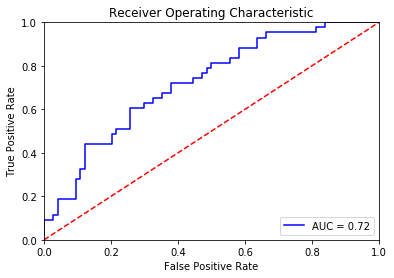

In [51]:
########################################
#print out binary class roc auc figure
############################################
fpr, tpr, threshold = metrics.roc_curve(y,y_xgb_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [52]:
########################################
#print out multiclass roc auc figure
############################################
#from sklearn.model_selection import cross_val_predict
#from sklearn.metrics import confusion_matrix

#cv = StratifiedKFold(n_splits = num_cv, random_state = r_seed)
#y_xgb_prob = cross_val_predict(xgb, X, y, cv = cv, method = 'predict_proba')

#import matplotlib.pyplot as plt
#plt.figure(figsize = (10, 8))
#plot_multiclass_roc_auc(y, y_xgb_prob, n_classes = 3, title = "xgb, SARC_high_var_0.2, 4 layers")
#plt.savefig('(0606)3class_roc_auc_xgb(4layers12k_0.1test)(SARC_high_var_0.2).png')

## Print out results for a given random seed

In [53]:
print(xgb)
print("Auroc across all folds: %0.5f" % (xgb_multiclass_auroc))
print("Random seed is: ", r_seed)
print("The confusion martix is:\n", xgb_conf_mat)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0, learning_rate=0.6, max_delta_step=0,
       max_depth=5, min_child_weight=0, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=55555, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1.0)
Auroc across all folds: 0.72250
Random seed is:  55555
The confusion martix is:
 [[58 16]
 [34  9]]
